In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import nengo

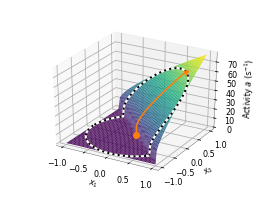

In [2]:
# Neuron model
G = lambda J: nengo.LIFRate().rates(
    J.reshape(-1), gain=1.0, bias=0.0).reshape(J.shape)

# Select gain and bias
α = 1.0
Jbias = 1.0

# Select an encoding vector and make sure that its normalised
e = np.array([1.0, 1.0]) 
e = e / np.linalg.norm(e)

# Regularly sample the x- and y-axis into a 2D-grid
xs = np.linspace(-1.0, 1.0, 50)
ys = np.linspace(-1.0, 1.0, 50)
xss, yss = np.meshgrid(xs, ys)

# Also sample along the unit circle
ϕs = np.linspace(-np.pi, np.pi, 1000)
cxs, cys = np.cos(ϕs), np.sin(ϕs)

# Compute the neuron activities at each grid-point
G_2D = lambda x1, x2: G(α * (x1 * e[0] + x2 * e[1]) + Jbias)
zss =  G_2D(xss, yss)
czs = G_2D(cxs, cys)

# Plot the activities
fig = plt.figure(figsize=(4.5, 3.5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xss, yss, zss, 
                cmap=cm.get_cmap('viridis'))
ax.plot(cxs, cys, czs,
        linewidth=2, color='white', zorder=5)
ax.plot(cxs, cys, czs, ':',
        linewidth=2, color='black', zorder=5)
color = cm.get_cmap('tab10')(0.15)
ax.plot([0], [0], G_2D(0, 0), 'o', color=color, zorder=10)
ax.plot([e[0]], [e[1]], [G_2D(*e)],
    marker=(3, 0, 65),
    zorder=10,
    color=color)
ax.plot(
    np.linspace(0, e[0], 100),
    np.linspace(0, e[1], 100),
    G_2D(np.linspace(0, e[0], 100), np.linspace(0, e[1], 100)),
    color=color,
    zorder=20)
ax.set_xticks(np.linspace(-1, 1, 5))
ax.set_yticks(np.linspace(-1, 1, 5))
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel('Activity $a$ ($\\mathrm{s}^{-1}$)');

ax.dist = 12 # Distance of the camera from the plot

fig.savefig("../2d_encoder_tuning_curve.pdf", transparent=True, bbox_inches='tight')

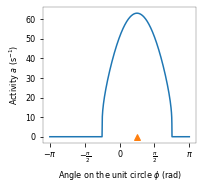

In [3]:
fig, ax = plt.subplots(figsize=(2.75, 2.5))
ax.plot(ϕs, czs)
ax.plot(np.arctan2(e[1], e[0]), 0, '^')
ax.set_xticks(np.linspace(-np.pi, np.pi, 5))
ax.set_xticklabels(['$-\\pi$', '$-\\frac{\\pi}{2}$', '0', '$\\frac{\\pi}{2}$', '$\\pi$'])
ax.set_xlabel('Angle on the unit circle $\\phi$ (rad)')
ax.set_ylabel('Activity $a$ ($\\mathrm{s}^{-1}$)')

fig.savefig("../2d_encoder_tuning_curve_unit.pdf", transparent=True, bbox_inches="tight")